In [1]:
# Program to connect to the tweeter api and collect tweets
# related to AI. For the sake of this experiment 
import tweepy as tw

# Important tweeter tokens for auth
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [2]:
# Collect tweets
search_words = ['#ai', '#artificial intelligence', '#artificialintelligence']
date_since = '2020-10-16'

# Since we are purely using this to evaluate the nltk/textblob 
# for sentiment analysis let's use a sample set of 100
sample_tweets = 100
tweets = []

for search_word in search_words:
    _tweet_obj = tw.Cursor(api.search,
                           q=search_word,
                           lang="en",
                           since=date_since).items(sample_tweets)
    for tweet in _tweet_obj:
        tweets.append(tweet.text)
    break
        
print(tweets)

['Reliable with excellent characteristics&amp;a unique idea I am very thankful to the team,because You created a very exc… https://t.co/MaohelVOFj', 'RT @_M_Dey: Researchers use AI to empower environmental regulators | #AI #Environment #Regulation #Pollution #Health #Sustainability #Machi…', 'RT @DVGallery: Deep Vision #00569\n\n#DeepVision #DeepVisionAI #CNFT #CNFTs #Cardano #CardanoCommunity #NFT #NFTs #NFTArt #AI #ArtificialInte…', 'RT @PrimeClasses_: Explore Our 100% Job Guarantee Programs by Prime Classes @ https://t.co/HLk8d1Sspt\n\nData Science Glossary -Representatio…', 'RT @Foxmental_X: This Article Was Written by Artificial Intelligence: How Do You Have a Better Relationship? | by I am Valerio | ILLUMINATI…', '#Microsoft Becomes World’s Most Valuable Stock as #Apple Drops https://t.co/QUYhYluq0w via @business #azure #cloud… https://t.co/mG1Wp9BGJX', 'This Article Was Written by Artificial Intelligence: How Do You Have a Better Relationship? | by I am Valerio | ILL… https://t.

In [3]:
print(len(tweets))

100


In [4]:
# First, let's use NLTK's sentiment-analysis across
# collected tweets
import pandas as pd
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df = pd.DataFrame(columns=['Tweet', 'Sentiment'])
for tweet in tweets:
    score = sia.polarity_scores(tweet)['compound']
    if score < 0:
        sentiment = 'Negative'
    elif score == 0:
        sentiment = 'Neutral'
    elif score > 0:
        sentiment = 'Positive'
        
    df = df.append({'Tweet': tweet, 'Sentiment': sentiment}, ignore_index=True)


df.head()

,Tweet,Sentiment
0,Reliable with excellent characteristics&amp;a ...,Positive
1,RT @_M_Dey: Researchers use AI to empower envi...,Neutral
2,RT @DVGallery: Deep Vision #00569\n\n#DeepVisi...,Positive
3,RT @PrimeClasses_: Explore Our 100% Job Guaran...,Positive
4,RT @Foxmental_X: This Article Was Written by A...,Positive


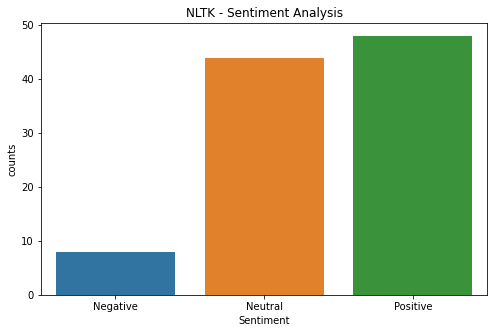

In [5]:
# Let's do a simple plot of sentiment derived by 
# this method
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_graph(title, label_groups):
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x="Sentiment", y="counts", data=label_groups)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(label="%s" %title)
    plt.show()


_labels = df.groupby('Sentiment').size().reset_index(name='counts')
plot_bar_graph('NLTK - Sentiment Analysis', _labels)

In [6]:
# Let's repeat this with textblob
from textblob import TextBlob

df_textblob = pd.DataFrame(columns=['Tweet', 'Sentiment'])

for tweet in tweets:
    score = TextBlob(tweet).sentiment.polarity
    if score < 0:
        sentiment = 'Negative'
    elif score == 0:
        sentiment = 'Neutral'
    elif score > 0:
        sentiment = 'Positive'
    df_textblob = df_textblob.append({'Tweet': tweet, 'Sentiment': sentiment}, ignore_index=True)

df_textblob.head()

,Tweet,Sentiment
0,Reliable with excellent characteristics&amp;a ...,Positive
1,RT @_M_Dey: Researchers use AI to empower envi...,Neutral
2,RT @DVGallery: Deep Vision #00569\n\n#DeepVisi...,Neutral
3,RT @PrimeClasses_: Explore Our 100% Job Guaran...,Neutral
4,RT @Foxmental_X: This Article Was Written by A...,Negative


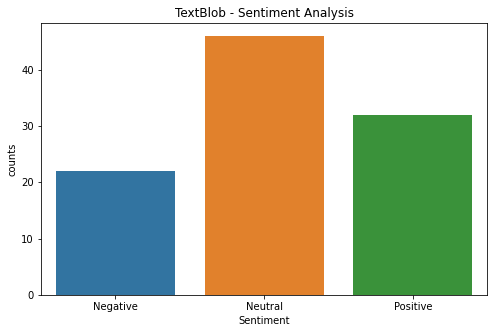

In [7]:
_labels = df_textblob.groupby('Sentiment').size().reset_index(name='counts')
plot_bar_graph('TextBlob - Sentiment Analysis', _labels)

In [63]:
# Building on HW-1, we will use the corpus of tweets on the AI
# tokenize, stem and lemmatize & use stop-words where neccesary

# Tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

all_words = []
for tweet in tweets:
    tweet = re.sub('http\S+', '', tweet)
    all_words.extend(word_tokenize(tweet))

print('Size of words = %d' % len(all_words))
# print(all_words[:5])
# print(all_words[-5:])

# As a first method, we are going to clean-up all noise like
# \#,@,?,&,! etc.

noise = ['#', '$', '&', '!', '@', 'amp', ',', ';', ':', 'RT', '.',
        '?', '%', '|', '(', ')']
all_words_filter = [word for word in all_words if word not in noise \
                    and word.lower() not in stopwords.words('english')]

print('Size of words (filtered) = %d' % len(all_words_filter))

print(all_words_filter[:10])
print(all_words_filter[-10:])


Size of words = 2494
Size of words (filtered) = 1245
['Reliable', 'excellent', 'characteristics', 'unique', 'idea', 'thankful', 'team', 'created', 'exc…', '_M_Dey']
['Companies', 'World', '2021', 'AI', 'MachineLearning', 'DeepLearning', 'coding', 'Python', '100DaysOfCode', 'Visu…']


In [64]:
# Stemming
# --------
# Stem is part of the word to which you can add inflectional
# affixes such as (-ed, -ize, -s, -de). Stemming is the process of removing 
# the inflectional affixes. 
# This is particularly useful in search engines and information retrieval 
# where stemming is used to index words. And therefore, instead of storing all 
# forms of words, the index can comprise merely stem words.

# Comparing a couple of Stemmers:
# 1. PorterStemmer
from nltk.stem import PorterStemmer
word_stemmer = PorterStemmer()
all_stem_words_porter = []
for word in all_words_filter:
    all_stem_words_porter.append(word_stemmer.stem(word))

# Let's look at a few instances of words that would be expected to be stemmed
stemming_words = {}

for word in all_words_filter:
    if word.endswith('ed') or word.endswith('ing'):
        try:
            if stemming_words[word]:
                continue
        except KeyError:
            stemming_words[word] = all_words_filter.index(word)

print('Words that can be stemmed: %s' % stemming_words)

# Comparing all_words_filter (comprising of all meaningful words) vs all_stem_words_porter (which 
# is all stemmed words emmanating from porterstemmer)
for word in stemming_words:
    _index = stemming_words[word]
    print('Original: %s VS Stem: %s' % (word, all_stem_words_porter[_index]))

Words that can be stemmed: {'created': 7, 'machinelearning': 112, 'MachineLearning': 121, 'DeepLearning': 122, 'coding': 123, 'Exploited': 132, 'Used': 160, 'infiltrating': 270, 'DigitalMarketing': 284, 'integrating': 288, 'learning': 290, 'Evolving': 335, 'programming': 371, 'including': 378, 'Deleted': 428, 'Comparing': 476, 'Augmented': 536, 'using': 559, 'transforming': 573, 'greed': 591, '💥Advanced': 596, 'sharing': 599, 'electric-powered': 609, 'developed': 613, 'Training': 631, 'Using': 647, 'Learning': 659, 'thrilling': 671, 'going': 686, 'making': 690, 'Coding': 741, 'Programming': 742, 'IntEngineering': 811, 'non-perfumed': 972, 'according': 979, 'predicting': 1051, 'marketing': 1072, 'Announcing': 1081, 'earned': 1091, 'completing': 1096, 'trying': 1099, 'uncomplicated': 1192}
Original: created VS Stem: creat
Original: machinelearning VS Stem: machinelearn
Original: MachineLearning VS Stem: machinelearn
Original: DeepLearning VS Stem: deeplearn
Original: coding VS Stem: code

In [65]:
# Lemmatization
# Lemmatization looks at the meaning of a word. The output we will get 
# after lemmatization is called ‘lemma’, which is a root word rather 
# than root stem, the output of stemming. See example below:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('believes'))
print(word_stemmer.stem('believes'))

# Here we get belief as the root word for believes while, we get
# root stem believ using the stemmer

belief
believ


In [66]:
all_lemma_words = []
for word in all_words_filter:
    all_lemma_words.append(lemmatizer.lemmatize(word))

print(all_lemma_words)

['Reliable', 'excellent', 'characteristic', 'unique', 'idea', 'thankful', 'team', 'created', 'exc…', '_M_Dey', 'Researchers', 'use', 'AI', 'empower', 'environmental', 'regulator', 'AI', 'Environment', 'Regulation', 'Pollution', 'Health', 'Sustainability', 'Machi…', 'DVGallery', 'Deep', 'Vision', '00569', 'DeepVision', 'DeepVisionAI', 'CNFT', 'CNFTs', 'Cardano', 'CardanoCommunity', 'NFT', 'NFTs', 'NFTArt', 'AI', 'ArtificialInte…', 'PrimeClasses_', 'Explore', '100', 'Job', 'Guarantee', 'Programs', 'Prime', 'Classes', 'Data', 'Science', 'Glossary', '-Representatio…', 'Foxmental_X', 'Article', 'Written', 'Artificial', 'Intelligence', 'Better', 'Relationship', 'Valerio', 'ILLUMINATI…', 'Microsoft', 'Becomes', 'World', '’', 'Valuable', 'Stock', 'Apple', 'Drops', 'via', 'business', 'azure', 'cloud…', 'Article', 'Written', 'Artificial', 'Intelligence', 'Better', 'Relationship', 'Valerio', 'ILL…', 'Explore', '100', 'Job', 'Guarantee', 'Programs', 'Prime', 'Classes', 'Data', 'Science', 'Glossary

In [125]:
# Vectorization
# Let's analyse the following techniques of vectorization:
# - Count vectorization
# - TF-IDF
# - N-grams

# Note that when vectorizing we will treat each tweet as a document
# and call a clean function which would remove noise chars, stop-words etc.

def clean_tweet(tweet):
    # Remove http links and RT user from tweets
    clean_1 = re.sub('http\S+', '', tweet)
    clean_2 = re.sub('RT @\S+', '', clean_1) 
    _clean_tweet = ''
    for word in clean_2.split():
        if word not in stopwords.words('english') and \
            word not in noise:
            _clean_tweet += ' ' + word
    #print(tweet, _clean_tweet)
    return _clean_tweet

# Count vectorization
# This is a basic method of counting the term frequency
# in a document
df_clean = pd.DataFrame(columns=['Tweet'])
for row in df['Tweet']:
    clean = {'Tweet': clean_tweet(row)}
    df_clean = df_clean.append(clean, ignore_index=True)

#print(df_clean)
    
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df_clean['Tweet'])
print(count_vectorizer.get_feature_names())
# Let's visualize the vectorized document
print(X.shape)
X.toarray()

# As seen in the output, many cells would comprise zeros since the words/features
# would not be present and this is therefore known as a Sparse Matrix. 

['000', '00569', '10', '100', '100daysofcode', '13', '2021', '2022', '30', '300', '4m', '5g', 'able', 'abstract', 'abstracts', 'academic', 'according', 'advanced', 'africanews', 'ageofcheapandaccurateprediction', 'agility', 'ai', 'algebra', 'algori', 'algorithm', 'allows', 'also', 'amp', 'amsinstitute', 'amsterdam', 'analytics', 'and', 'announcing', 'antibodies', 'apple', 'application', 'applications', 'ar', 'arm', 'art', 'article', 'artificial', 'artificialin', 'artificialinte', 'artificialintelligenc', 'artificialintelligence', 'artist', 'artwork', 'aschettino', 'asksid', 'augmented', 'augmentedreality', 'automation', 'awards', 'azure', 'based', 'bats', 'because', 'becomes', 'bell', 'benefit', 'best', 'better', 'big', 'bigdata', 'biggest', 'biostatistics', 'bitcoin', 'blockchain', 'blog', 'boost', 'booth', 'boston', 'bostondynamics', 'boys', 'brushstrokes', 'build', 'bullock', 'burn', 'business', 'by', 'can', 'car', 'card', 'cardano', 'cardanocommunity', 'career', 'carlasafe', 'case'

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [126]:
# Next, let's try an n-gram term frequency vectorization
count_vectorizer2 = CountVectorizer(ngram_range=(2, 2))
X2 = count_vectorizer2.fit_transform(df_clean['Tweet'])
print(count_vectorizer2.get_feature_names())
print(X2.shape)
X2.toarray()

['000 weeds', '00569 deepvision', '10 end', '100 000', '100 biggest', '100 job', '100daysofcode ai', '100daysofcode mumbai', '100daysofcode python', '100daysofcode visu', '13 in', '2021 ai', '2021 recipients', '2021 survey', '2022 pierrepinna', '30 brushstrokes', '30 critical', '300 brushstrokes', '4m boost', '5g 100daysofcode', '5g datascience', '5g rpa', 'able fast', 'abstract 300', 'abstract artist', 'academic field', 'advanced ai', 'africanews english', 'agility resiliency', 'ai allows', 'ai analytics', 'ai artificial', 'ai artificialin', 'ai artificialinte', 'ai artificialintelligence', 'ai best', 'ai big', 'ai blog', 'ai cloud', 'ai cybersecurity', 'ai datascience', 'ai digital', 'ai digitalpeople', 'ai empower', 'ai environment', 'ai gpt3', 'ai healthcare', 'ai iiot', 'ai iot', 'ai learning', 'ai machinelearning', 'ai marketing', 'ai ml', 'ai music', 'ai projects', 'ai rob', 'ai robotic', 'ai robotics', 'ai semiautonomous', 'ai straightforward', 'ai styletransfer', 'ai takes', '

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [128]:
# Finally, we will use the TF-IDF vectoization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X3 = tfidf_vectorizer.fit_transform(df_clean['Tweet'])
print(tfidf_vectorizer.get_feature_names())
print(X3.shape)
X3.toarray()

['000', '00569', '10', '100', '100daysofcode', '13', '2021', '2022', '30', '300', '4m', '5g', 'able', 'abstract', 'abstracts', 'academic', 'according', 'advanced', 'africanews', 'ageofcheapandaccurateprediction', 'agility', 'ai', 'algebra', 'algori', 'algorithm', 'allows', 'also', 'amp', 'amsinstitute', 'amsterdam', 'analytics', 'and', 'announcing', 'antibodies', 'apple', 'application', 'applications', 'ar', 'arm', 'art', 'article', 'artificial', 'artificialin', 'artificialinte', 'artificialintelligenc', 'artificialintelligence', 'artist', 'artwork', 'aschettino', 'asksid', 'augmented', 'augmentedreality', 'automation', 'awards', 'azure', 'based', 'bats', 'because', 'becomes', 'bell', 'benefit', 'best', 'better', 'big', 'bigdata', 'biggest', 'biostatistics', 'bitcoin', 'blockchain', 'blog', 'boost', 'booth', 'boston', 'bostondynamics', 'boys', 'brushstrokes', 'build', 'bullock', 'burn', 'business', 'by', 'can', 'car', 'card', 'cardano', 'cardanocommunity', 'career', 'carlasafe', 'case'

array([[0.        , 0.        , 0.        , ..., 0.        , 0.25361712,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.27999308, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [134]:
# Let us now sort and print a summary of the TF-IDF terms
df_tfidf = pd.DataFrame(X3[0].T.todense(),
                        index=tfidf_vectorizer.get_feature_names(), columns=['TF-IDF'])
df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
df_tfidf

# From the results below, the important word features are thankful,
# idea, because, created and reliable. While words like enzc, environmental, etc with
# TF-IDF 0 are not really important words.

,TF-IDF
thankful,0.295188
idea,0.295188
because,0.295188
created,0.295188
reliable,0.295188
...,...
enzc,0.000000
environmental,0.000000
environment,0.000000
english,0.000000


In [135]:
# Using k-means clustering to cluster data
# For this task, we will include a second topic related to 
# reviews. We will use a dataset from Kaggle related to Pink Floyd's
# Dark side of the moon
from sklearn.cluster import KMeans

# Load a csv into a data-frame
df_review = pd.read_csv('/Users/venkatasharatsripada/Downloads/dsotm_reviews.csv')
df_review.head()

,Review,Rating
0,"""More has been said about Dark Side of the Moo...",4.5
1,What can I possibly say about an album that no...,5.0
2,You know for a band that spent several albums ...,2.0
3,Has finally clicked with me in full ...,4.0
4,So why are people afraid to say this...,4.5


In [146]:
# We will do some basic cleaning by removing stop words etc.
df_review_clean = pd.DataFrame(columns=['Review'])

for row in df_review['Review'].head(100):
    _clean_row = ''
    for word in row.split():
        if word not in stopwords.words('english') and \
            word not in noise:
            _clean_row += ' ' + word
    df_review_clean = df_review_clean.append({'Review': _clean_row}, ignore_index=True)

df_review_clean.head()

(100, 1)


,Review
0,"""More said Dark Side Moon ever necessary posi..."
1,What I possibly say album means much many inf...
2,You know band spent several albums trying ato...
3,Has finally clicked full 30 years absolutely ...
4,So people afraid say isnt masterpiece basical...


In [153]:
# We will form a combined dataframe with twitter and review
frames = [df_clean['Tweet'], df_review_clean['Review']]
df_combined = pd.concat(frames)

# Shuffle the data
df_combined = df_combined.sample(frac=1).reset_index(drop=True)

print(df_combined.head())

# Let's use the vectorization type TF-IDF
X4 = tfidf_vectorizer.fit_transform(df_combined)

0     DM help Exams Essays, Math English #Newyork A...
1     The best concept album date. And closest thin...
2     Forty-three minutes pure synesthesia. Drugs o...
3     As much I want fuck record I cant. And really...
4     This truly quite excellent album. There whole...
dtype: object


In [154]:
# And finally run the k-means clustering

# Set k = 2, since we expect two cluster topics - AI, Album review
true_k = 2

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X4)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [158]:
# Let's derive the centroids and their features
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

# Print the centroids & the clusters where it belongs
for i in range(true_k):
 print("Cluster %d:" % i),
 for ind in order_centroids[i, :10]:
     print(" %s" % terms[ind])
    
# See below a reasonably nice clustering of the words from the two topics

Cluster 0:
 album
 the
 time
 side
 one
 dark
 it
 music
 great
 moon
Cluster 1:
 ai
 machinelearning
 100daysofcode
 python
 iot
 datascience
 artificial
 5g
 cybersecurity
 ar


In [179]:
# Let's pick up a sentence from the review outside the train set 
# and check the cluster prediction
text = df_review['Review'].loc[101]
print([text])

X5 = tfidf_vectorizer.transform([text])

predicted = model.predict(X5)
print(predicted[0])

# The model did a pretty nice job of classifying the text as Review (cluster-0).

['As you know this album is highly appreciated among music lovers but I unfortunately did not like it so much. Progressive Rock has its place in music and I am sure that there are many people who would enjoy listening to it. However as far as Im concerned Pink Floyds music is nothing more than an imitation of progressive rock. It lacks originality and does not even try to be innovative. This album is just another copy of something else that was already done before. I have been listening to some progressive rock lately and I think that Pink Floyd could learn a lot from the bands like Yes King Crimson Jethro Tull or even Rush. These bands are always trying to create new sounds or at least never seem to be bored of what they are doing. "The Dark Side Of The Moon" is a very safe album because it does nothing to push the envelope or challenge the listener. There are good ditties like "Time" or "Money" on here but for the most part this album is just boring. I hope you do not think that I am